In [75]:
import pandas as pd
import numpy as np
import random

In [76]:
pd.set_option('display.max_columns', 500)
df_test = pd.read_csv('pisa2009test.csv')
df_train = pd.read_csv('pisa2009train.csv')
#set OG dataset for future use
og_train = df_train.copy()

### Exploration

In [77]:
df_train.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3607.000000,3601.000000,3566.000000,3266.000000,3570.000000,3418.000000,3094.000000,3430.000000,3594.000000,3592.000000,3550.000000,3592.000000,3598.000000,3629.000000,3477.000000,3414.000000,3520.000000,3663.000000,3663.000000,3501.000000,3663.000000
mean,10.089817,0.511057,0.722761,0.785893,0.879978,0.348132,0.734454,0.859274,0.331933,0.853061,0.931274,0.772550,0.766761,0.871659,0.899389,0.289887,266.208225,24.499414,0.967614,0.933934,0.384930,1369.316767,497.911403
std,0.554375,0.499946,0.447697,0.410259,0.325033,0.476451,0.441685,0.347789,0.470983,0.354096,0.253022,0.419244,0.422953,0.334515,0.300855,0.453772,148.403525,7.184348,0.177049,0.248431,0.486645,869.983618,95.515153
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,431.705000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,566.230000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2400.000000,75.000000,1.000000,1.000000,1.000000,6694.000000,746.000000


In [78]:
print("test dimension" + str(df_test.shape))
print("train dimension" + str(df_train.shape))


test dimension(1570, 24)
train dimension(3663, 24)


In [79]:
df_train.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [80]:
df_test.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


In [81]:
df_test.dtypes

grade                      int64
male                       int64
raceeth                   object
preschool                float64
expectBachelors          float64
motherHS                 float64
motherBachelors          float64
motherWork               float64
fatherHS                 float64
fatherBachelors          float64
fatherWork               float64
selfBornUS               float64
motherBornUS             float64
fatherBornUS             float64
englishAtHome            float64
computerForSchoolwork    float64
read30MinsADay           float64
minutesPerWeekEnglish    float64
studentsInEnglish        float64
schoolHasLibrary         float64
publicSchool               int64
urban                      int64
schoolSize               float64
readingScore             float64
dtype: object

In [82]:
num_missing_data = df_train.isnull().sum().tolist()
col_name = df_train.columns.tolist()

In [83]:
tuples = list(zip(col_name, num_missing_data))
missing_data = pd.DataFrame(tuples, columns=['col_name', 'num_missing_data'])


In [84]:
df_test.isnull().sum()

grade                      0
male                       0
raceeth                   13
preschool                 21
expectBachelors           23
motherHS                  45
motherBachelors          188
motherWork                36
fatherHS                 125
fatherBachelors          288
fatherWork               113
selfBornUS                24
motherBornUS              23
fatherBornUS              58
englishAtHome             27
computerForSchoolwork     30
read30MinsADay            21
minutesPerWeekEnglish    103
studentsInEnglish        114
schoolHasLibrary          58
publicSchool               0
urban                      0
schoolSize                69
readingScore               0
dtype: int64

In [85]:
df_train.isnull().sum()

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

### cleaning

#### As shown above it is seen that the majority of varibles have missing data, and thus removing these missing data will remove more than 40% of the original data alternative solutions had to be taken 1. Replace booleans values at random by chance calculated by the percentage of 1s and 0s already presented in the dataset 2. Replace none booleans missing observations by the average of each respective variable 3. Remove all missing values for variable raceeth (since a small percentage of their observations were missing, it is not statistically significant). S.N (using iterrows() is super slow so the remove_na() function takes awhile to run)

In [86]:
class data_cleaning():
    
    def __init__(self, df):
        self.df = df
        
    #find percentage of missing data within a column    
    def percentage_missing(self):
        #get col name and num of missing data into list
        self.num_missing_data = self.df.isnull().sum().tolist()
        self.col_names = self.df.columns.tolist()
        
        #turn it into dataframe
        tuples = list(zip(self.col_names, self.num_missing_data))
        missing_data = pd.DataFrame(tuples, columns=['col_name', 'num_missing_data'])
        
        #get number of rows
        dim = self.df.shape
        row_num = dim[0]
        
        #do calculations
        missing_data['percentage_missing'] = (missing_data['num_missing_data']/row_num)*100
        return missing_data
    
    #get missing column name
    def get_missing_col_name(self):
        missing_col_list = self.df.columns[self.df.isnull().any()].tolist()
        return missing_col_list
    
    #replace missing bolean variables by chance calculated by percentage of 1.0s and 0.0s
    def remove_na(self):
        target_df = self.df
        missing_col_list = self.df.columns[self.df.isnull().any()].tolist()
        
        for i, row in target_df.iterrows():
            for j in missing_col_list:
                if (j != 'raceeth' and j != 'schoolSize' and j != 'studentsInEnglish' and j !='minutesPerWeekEnglish'):
                    #get number of values presented of each observation and find percentage of each
                    num_missing_obs = target_df[j].value_counts().sort_index()
                    chance_for_0s = (num_missing_obs[0]/(num_missing_obs[1]+num_missing_obs[0]))*100
                
                    #random assign 1s and 0s for missing data by calculated chance
                    if(str(row[j]) == 'nan'):
                        if (random.randint(0,100) < chance_for_0s): 
                            target_df.at[i,j] = 0.0
                        else:
                            target_df.at[i,j] = 1.0
                        
                elif(j != 'raceeth'):
                    
                    #replace non-bolean val with mean value
                    mean_val = target_df[j].mean()
                    target_df.at[i,j] = mean_val
        
        #drop missing race rows 
        target_df.dropna(subset = ["raceeth"], inplace=True)
                    
        
        return target_df
            
        
        
   

In [87]:
#Calculate percentage missing from among each variable for both train and test set

In [88]:
obj = data_cleaning(df_test)
obj.percentage_missing()

,col_name,num_missing_data,percentage_missing
0,grade,0,0.000000
1,male,0,0.000000
2,raceeth,13,0.828025
3,preschool,21,1.337580
4,expectBachelors,23,1.464968
5,motherHS,45,2.866242
6,motherBachelors,188,11.974522
7,motherWork,36,2.292994
8,fatherHS,125,7.961783
9,fatherBachelors,288,18.343949


In [89]:
obj = data_cleaning(df_train)
obj.percentage_missing()

,col_name,num_missing_data,percentage_missing
0,grade,0,0.000000
1,male,0,0.000000
2,raceeth,35,0.955501
3,preschool,56,1.528802
4,expectBachelors,62,1.692602
5,motherHS,97,2.648103
6,motherBachelors,397,10.838111
7,motherWork,93,2.538903
8,fatherHS,245,6.688507
9,fatherBachelors,569,15.533716


In [90]:
#start the cleaning process remove_na() slow due to itterow()

In [91]:
obj = data_cleaning(df_test)
clean_df_test = obj.remove_na()

In [92]:
clean_df_test.isnull().sum()

grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

In [93]:
clean_df_test.shape

(1557, 24)

In [94]:
obj = data_cleaning(df_train)
clean_df_train = obj.remove_na()

In [95]:
clean_df_train.isnull().sum()

grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

In [96]:
clean_df_train.shape

(3628, 24)

### Regression Exploration

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt


##### Correlation coeeficient analysis between different variable pairs are observed in this analysis to distingush which variables we want to use to determine it's regression relationship with 'readingScore', additionally an observation of correlation coefficient of the 'OG (original)' dataset was also oberserved to see if our randomizing process for eliminating the missing values had any significant impact on the overall meaning of the data.

In [98]:
#after cleaning data set
clean_df_train['raceeth'],_ = pd.factorize(clean_df_train['raceeth'], sort=True)
clean_data_matrix = clean_df_train.corr()
clean_data_matrix 

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
grade,1.000000,-0.098515,-0.004510,-0.023602,0.136588,0.006340,0.044265,0.016080,0.052956,0.052491,0.013110,-0.022817,-0.075977,-0.060555,-0.021920,0.109617,0.064783,0.009729,0.013379,-0.022874,-0.064192,0.081559,-0.002027,0.284216
male,-0.098515,1.000000,-0.001656,0.012529,-0.078954,0.028964,0.060100,-0.013002,0.013400,0.066539,0.025970,0.020489,0.014466,0.004255,-0.008441,-0.014368,-0.220641,0.018162,0.020162,0.030580,-0.076857,0.037326,0.017415,-0.155335
raceeth,-0.004510,-0.001656,1.000000,0.076323,0.049643,0.215287,0.130588,0.055199,0.177823,0.161100,0.099288,0.209376,0.436370,0.429638,0.337976,0.119106,-0.027139,0.003679,0.010825,0.002406,-0.062158,-0.300595,-0.035142,0.280774
preschool,-0.023602,0.012529,0.076323,1.000000,0.071538,0.135908,0.130088,0.067361,0.108331,0.113647,0.061471,0.091108,0.108656,0.105672,0.117181,0.078658,-0.010280,0.025762,0.035643,0.041114,-0.069230,-0.056208,0.000566,0.038670
expectBachelors,0.136588,-0.078954,0.049643,0.071538,1.000000,0.095095,0.149952,0.069061,0.143762,0.165694,0.004108,-0.006663,0.007059,0.012525,0.044709,0.123805,0.136798,0.005830,0.006884,0.066998,-0.111515,-0.003612,-0.005544,0.349918
motherHS,0.006340,0.028964,0.215287,0.135908,0.095095,1.000000,0.221082,0.166958,0.466379,0.204024,0.043581,0.168344,0.322900,0.307083,0.354307,0.188061,0.007589,0.020865,-0.007559,0.009077,-0.066994,-0.116216,-0.013625,0.149384
motherBachelors,0.044265,0.060100,0.130588,0.130088,0.149952,0.221082,1.000000,0.125121,0.161004,0.451367,0.059872,0.034127,0.123283,0.106907,0.153453,0.129053,0.015689,0.011157,0.027472,0.023922,-0.151626,-0.040634,-0.000859,0.195313
motherWork,0.016080,-0.013002,0.055199,0.067361,0.069061,0.166958,0.125121,1.000000,0.094279,0.048363,0.038265,0.061317,0.095828,0.089047,0.127309,0.079901,-0.048350,0.023840,-0.010728,-0.005108,-0.036907,-0.007171,-0.024378,0.041452
fatherHS,0.052956,0.013400,0.177823,0.108331,0.143762,0.466379,0.161004,0.094279,1.000000,0.244092,0.091400,0.120845,0.247125,0.276628,0.281379,0.160792,0.025867,-0.003073,-0.008682,0.052935,-0.080536,-0.094172,-0.018535,0.168605
fatherBachelors,0.052491,0.066539,0.161100,0.113647,0.165694,0.204024,0.451367,0.048363,0.244092,1.000000,0.100605,0.002845,0.068342,0.075302,0.113923,0.152769,0.027238,-0.015796,0.007323,-0.006157,-0.159625,-0.019401,-0.011018,0.216899


<AxesSubplot:>

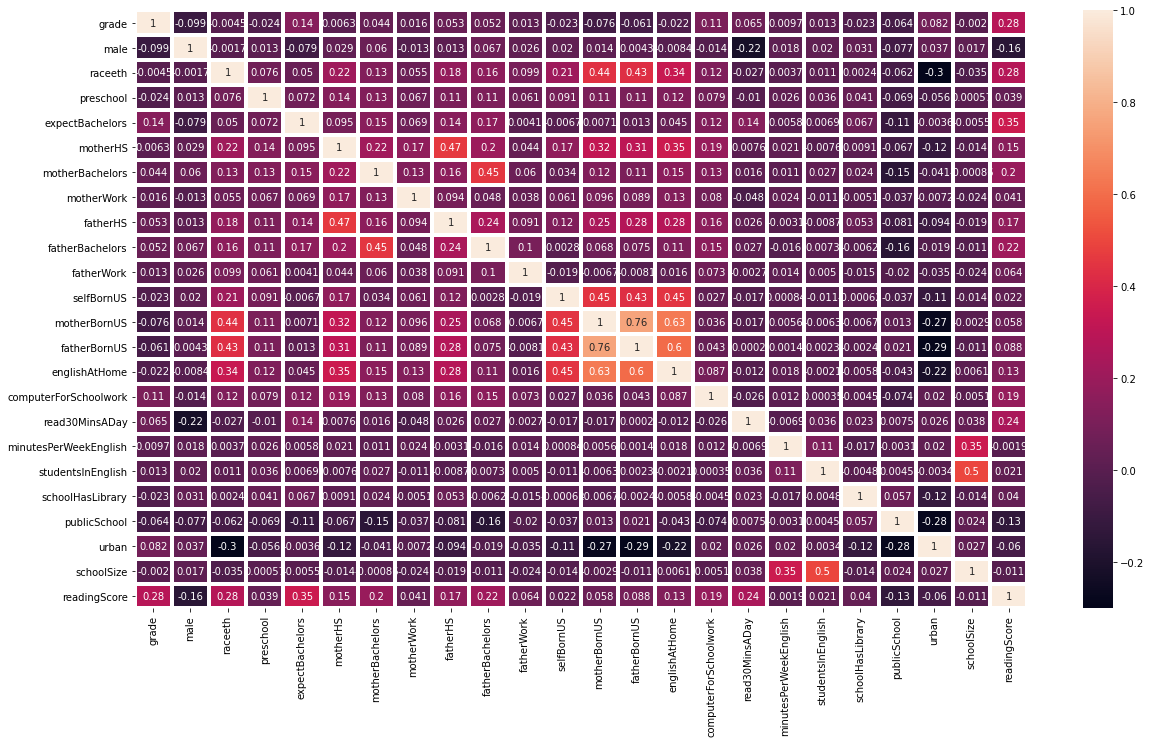

In [99]:
plt.figure(figsize=(20,11))
sns.heatmap(clean_df_train.corr(), annot=True, lw=3)

In [101]:
#data set before cleaning 
og_train.dropna()
og_train['raceeth'],_ = pd.factorize(og_train['raceeth'], sort=True)
og_data_matrix = og_train.corr()
og_data_matrix

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
grade,1.000000,-0.097677,0.001704,-0.023262,0.140200,0.005461,0.043171,0.019385,0.046210,0.061713,0.012731,-0.022154,-0.072814,-0.063530,-0.025675,0.112157,0.065008,0.028157,0.085289,-0.026542,-0.063972,0.076277,0.067454,0.286752
male,-0.097677,1.000000,0.001449,0.014807,-0.078029,0.030586,0.074250,-0.011641,0.017784,0.076257,0.030614,0.022550,0.015107,0.008212,-0.009790,-0.015485,-0.220103,0.010700,-0.025404,0.032114,-0.075466,0.036377,0.012921,-0.153928
raceeth,0.001704,0.001449,1.000000,0.073215,0.054678,0.219955,0.163315,0.057938,0.183979,0.186155,0.107514,0.215796,0.443908,0.442903,0.340558,0.118837,-0.019845,0.037220,-0.047552,0.006525,-0.063668,-0.297182,-0.174765,0.289873
preschool,-0.023262,0.014807,0.073215,1.000000,0.076046,0.141552,0.151832,0.069249,0.117443,0.141418,0.065079,0.092893,0.111684,0.112208,0.120480,0.076612,-0.008649,-0.015110,-0.027114,0.036506,-0.070919,-0.053684,-0.032582,0.040537
expectBachelors,0.140200,-0.078029,0.054678,0.076046,1.000000,0.104886,0.168330,0.069366,0.156028,0.199217,0.003122,-0.010330,0.012359,0.015281,0.044169,0.130413,0.135002,0.018364,0.050988,0.072164,-0.112698,-0.004022,0.016164,0.360144
motherHS,0.005461,0.030586,0.219955,0.141552,0.104886,1.000000,0.252322,0.176354,0.500723,0.227148,0.038105,0.179856,0.343146,0.336373,0.374486,0.187951,0.011641,0.019021,-0.036948,0.012129,-0.067646,-0.117988,-0.084460,0.156488
motherBachelors,0.043171,0.074250,0.163315,0.151832,0.168330,0.252322,1.000000,0.142306,0.197929,0.543581,0.071973,0.044804,0.146741,0.125661,0.169733,0.146681,0.021138,0.023004,-0.041765,0.022990,-0.161796,-0.048131,-0.011638,0.214240
motherWork,0.019385,-0.011641,0.057938,0.069249,0.069366,0.176354,0.142306,1.000000,0.102632,0.057245,0.039578,0.065549,0.096057,0.096592,0.128595,0.083805,-0.049956,0.009103,-0.032115,-0.011439,-0.036711,-0.012350,-0.039499,0.043401
fatherHS,0.046210,0.017784,0.183979,0.117443,0.156028,0.500723,0.197929,0.102632,1.000000,0.280287,0.100620,0.139385,0.279932,0.308128,0.324131,0.173284,0.032457,0.041421,-0.007217,0.030027,-0.080654,-0.098083,-0.080115,0.175464
fatherBachelors,0.061713,0.076257,0.186155,0.141418,0.199217,0.227148,0.543581,0.057245,0.280287,1.000000,0.106328,0.011592,0.081497,0.091718,0.138824,0.174256,0.047728,0.007736,-0.019529,0.017605,-0.176680,-0.018506,0.019602,0.266236


<AxesSubplot:>

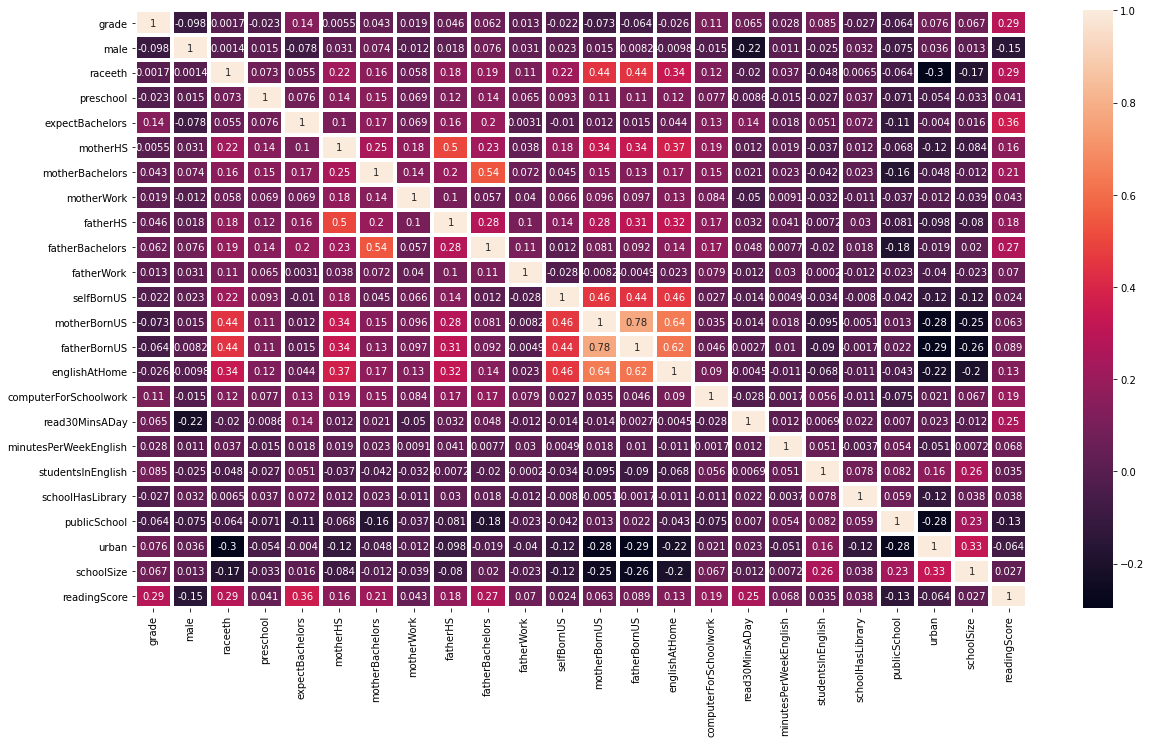

In [102]:
plt.figure(figsize=(20,11))
sns.heatmap(og_train.corr(), annot=True, lw=3)

In [103]:
diff = og_data_matrix.iloc[-1:].sub(clean_data_matrix.iloc[-1:])
percent_change = diff.div(clean_data_matrix.iloc[-1:]).mul(100).abs()
percent_change

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
readingScore,0.892232,0.9057,3.240532,4.825766,2.922456,4.755805,9.690884,4.701647,4.067873,22.746881,10.297311,5.230656,8.860975,1.317645,0.242333,2.438364,1.201714,3618.410795,68.447182,3.771511,1.22579,7.347829,348.270971,0.0


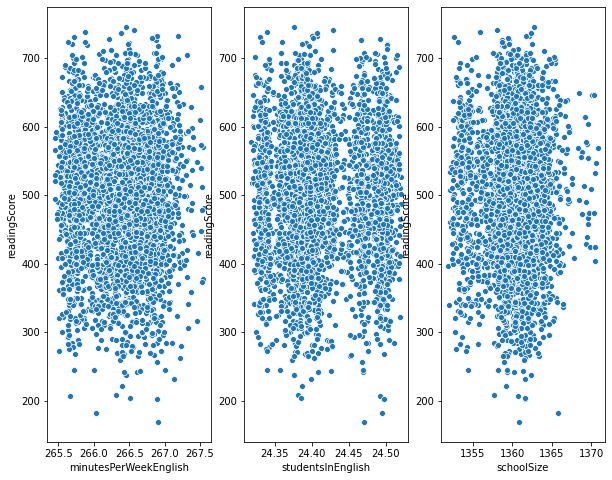

In [104]:
# sns.scatterplot(data=clean_df_train, x=clean_df_train[clean_df_train.columns], y=clean_df_train['readingScore'])
count=1
col_name = ['minutesPerWeekEnglish','studentsInEnglish','schoolSize']
plt.subplots(figsize=(10, 8))
for i in col_name:
    plt.subplot(1,3, count)
    sns.scatterplot(data=clean_df_train, x=clean_df_train[i], y=clean_df_train['readingScore'])
    count+=1
plt.show()

###### Above display the percentage change of correlation coefficients when comparing the correlation coefficients of the clean vs the original dataset. Most of these percentage change was under 20%, however, it should be noted that the largests percentage change comes from 'minutesPerWeekEnglish','studentsInEnglish', and 'schoolSize', where we replace the missing values with the respective mean of each variables. Additionally, scatterplots of non-binary variables were also used to explore the relationship with 'readingscore'. None of those variables had any linear relationship with 'readingScore'. Thus, it is predicted that the R2 of this regression will be very low and might not consider any strong relationships among the targeted varaibles to readingScore

### Regression Analysis

#### Based on the correlation coefficient exploration above, we can see that each variable correlation coefficient to 'readingScore' is weak or there's no correlation at all. However, for the purpose of this assignment all variables with a correlation coefficients of >= +-0.10 will be chosen. 

In [105]:
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
regression_var = []
for i in clean_data_matrix.iloc[-1:].items():
    if(abs(i[1][0])>0.10):
        regression_var.append(i[0])
regression_var.remove('readingScore')
regression_var

['grade',
 'male',
 'raceeth',
 'expectBachelors',
 'motherHS',
 'motherBachelors',
 'fatherHS',
 'fatherBachelors',
 'englishAtHome',
 'computerForSchoolwork',
 'read30MinsADay',
 'publicSchool']

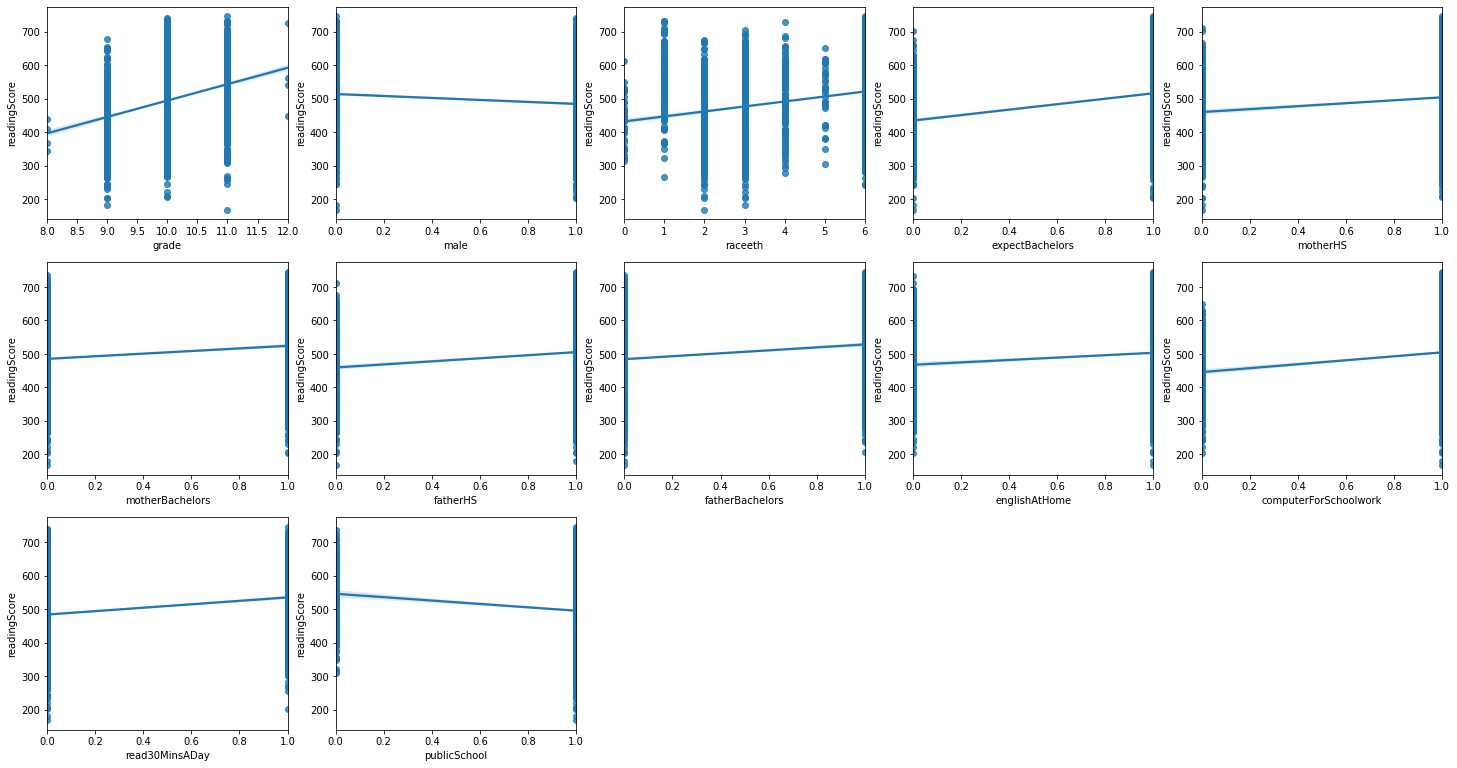

In [129]:
count=1
plt.subplots(figsize=(25, 18))
for i in regression_var:
    plt.subplot(4,5, count)
    sns.regplot(data=clean_df_train, x=clean_df_train[i], y=clean_df_train['readingScore'])
    count+=1
plt.show()

In [130]:
x_train= clean_df_train[regression_var]
y_train = clean_df_train['readingScore']

clean_df_test['raceeth'],_ = pd.factorize(clean_df_test['raceeth'], sort=True)
x_test = clean_df_test[regression_var]
y_test = clean_df_test['readingScore']

In [131]:
linear_regression = linear_model.LinearRegression()

In [132]:
reg_train = linear_regression.fit(x_train, y_train)
reg_train

LinearRegression()

In [133]:
y_pred = reg_train.predict(x_test)
print(y_pred)

[474.7416662  445.29415593 461.92911272 ... 479.43971565 582.24015449
 530.79206675]


In [134]:
coeff_df = pd.DataFrame(reg_train.coef_, x_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
grade,36.592156
male,-16.634957
raceeth,12.367529
expectBachelors,54.613189
motherHS,4.981591
motherBachelors,12.812553
fatherHS,6.895061
fatherBachelors,14.249765
englishAtHome,0.660693
computerForSchoolwork,24.983948


In [135]:
print('Intercept: \n', reg_train.intercept_)

print('Intercept: \n', reg_train.intercept_)

Intercept: 
 5.608564792343088


In [136]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.29


In [137]:
print('mean_squared_error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Explained Variance Score', metrics.explained_variance_score(y_test, y_pred))

mean_squared_error: 6544.95
Root Mean Squared Error: 80.90085592448735
Mean Absolute Error: 64.30630578289285
Explained Variance Score 0.28513626664290825


In [143]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result[1:20]

,Actual,Predicted
1,385.57,445.294156
2,522.62,461.929113
3,406.24,474.741666
4,453.50,530.792067
5,437.78,475.580699
6,405.13,426.359475
7,665.05,500.564647
8,604.84,564.219122
9,626.08,514.252847
10,525.32,516.542302


In [142]:
accuracy = linear_regression.score(x_test,y_test)
print(accuracy*100,'%')

28.512398177287167 %
